Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("teste_indicium_precificacao.csv")

In [3]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1.0,365.0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194.0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1.0,0.0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1.0,129.0


In [4]:
df_descricao = df.describe().T
df_descricao = df_descricao.applymap(lambda x: "{:.2f}".format(x) if isinstance(x, float) else x)
df_descricao

,count,mean,std,min,25%,50%,75%,max
id,22070.00,8516472.90,5261315.95,2595.00,4000573.00,8523715.00,13258079.75,17757976.00
host_id,22070.00,24493012.34,27106977.39,2571.00,3977937.00,14289427.00,36579485.00,121185129.00
latitude,22070.00,40.73,0.05,40.50,40.69,40.72,40.76,40.91
longitude,22070.00,-73.96,0.04,-74.24,-73.98,-73.96,-73.94,-73.71
price,22070.00,151.25,235.52,10.00,73.00,110.00,175.00,10000.00
minimo_noites,22070.00,7.41,23.88,1.00,2.00,3.00,5.00,1250.00
numero_de_reviews,22070.00,35.80,58.85,0.00,1.00,9.00,45.00,629.00
reviews_por_mes,18368.00,0.95,1.30,0.01,0.10,0.36,1.31,16.22
calculado_host_listings_count,22069.00,3.72,12.94,1.00,1.00,1.00,2.00,121.00
disponibilidade_365,22069.00,103.52,132.62,0.00,0.00,9.00,221.00,365.00


Pelo método describe, podemos perceber outliers bem explícitos em variáveis importantes, como price (Com a máxima chegando a 10 mil e a mínima sendo 0?). Para esse caso, afim de normalizar a variável será criada uma nova variável price_log com o logaritmo da variável.

In [5]:
#Hotel de Graça? Trivago
df = df[df.price > 0]

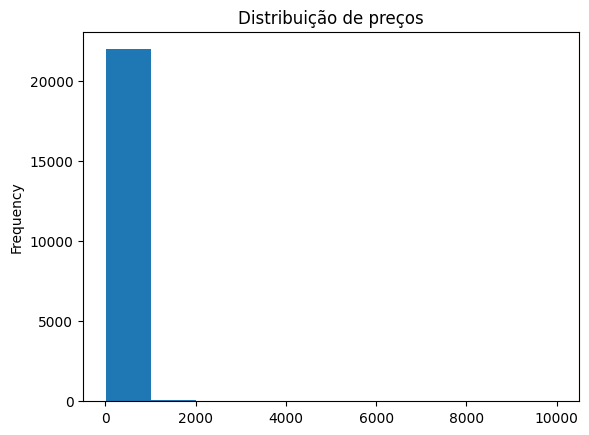

In [6]:
df.price.plot(kind="hist")
plt.title("Distribuição de preços")
plt.show()

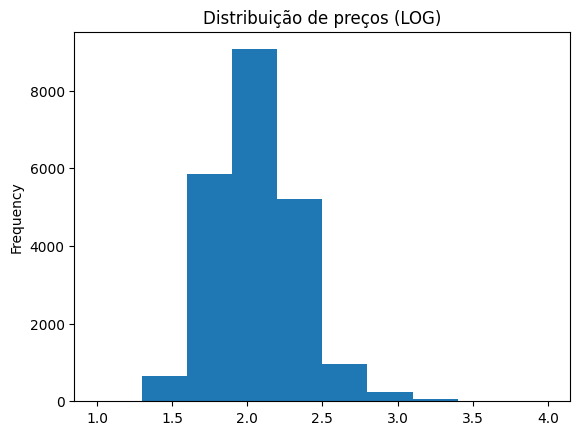

In [7]:
df["price_log"] = np.log10(df.price)
df.price_log.plot(kind="hist")
plt.title("Distribuição de preços (LOG)")
plt.show()

Agora sim a distribuição de preços tem a cara bem melhor, se assimilando mais a uma distribuição normal

In [8]:
df_descricao = df.describe().T
df_descricao = df_descricao.applymap(lambda x: "{:.2f}".format(x) if isinstance(x, float) else x)
df_descricao

,count,mean,std,min,25%,50%,75%,max
id,22070.00,8516472.90,5261315.95,2595.00,4000573.00,8523715.00,13258079.75,17757976.00
host_id,22070.00,24493012.34,27106977.39,2571.00,3977937.00,14289427.00,36579485.00,121185129.00
latitude,22070.00,40.73,0.05,40.50,40.69,40.72,40.76,40.91
longitude,22070.00,-73.96,0.04,-74.24,-73.98,-73.96,-73.94,-73.71
price,22070.00,151.25,235.52,10.00,73.00,110.00,175.00,10000.00
minimo_noites,22070.00,7.41,23.88,1.00,2.00,3.00,5.00,1250.00
numero_de_reviews,22070.00,35.80,58.85,0.00,1.00,9.00,45.00,629.00
reviews_por_mes,18368.00,0.95,1.30,0.01,0.10,0.36,1.31,16.22
calculado_host_listings_count,22069.00,3.72,12.94,1.00,1.00,1.00,2.00,121.00
disponibilidade_365,22069.00,103.52,132.62,0.00,0.00,9.00,221.00,365.00


---

### **Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**

1. Há variações dos preços nos diferentes bairros da cidade?

In [9]:
df.bairro_group.value_counts(normalize=True)

Manhattan        0.462528
Brooklyn         0.430494
Queens           0.087041
Bronx            0.014454
Staten Island    0.005483
Name: bairro_group, dtype: float64

Temos Manhattam e Brooklyn dominando os alugueis na plataforma, vamos ver como eles se saem em relação a média de preços por bairros

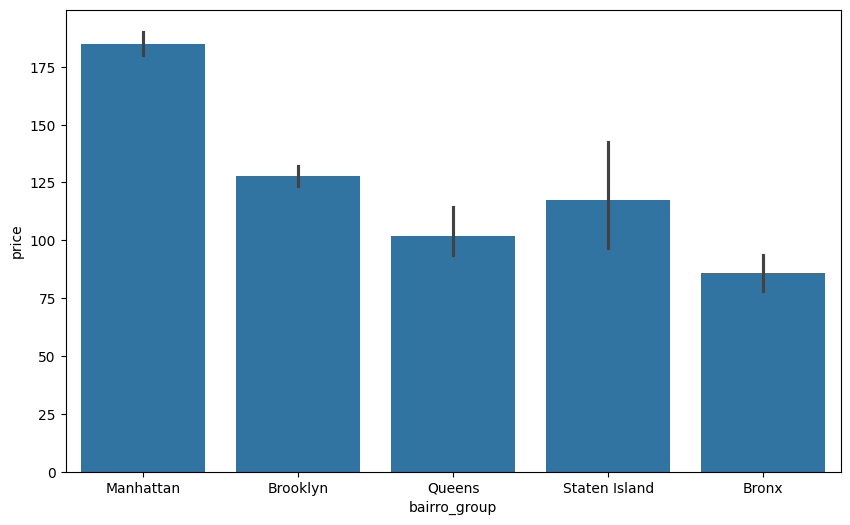

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x="bairro_group", y="price", data=df)
plt.show()

Como já era esperado, os aluguéis em Manhattam são bem mais caros em relação a outros bairros. Isso se deve provavelmente a alta demanda pela localização pelos pontos turísticos por lá https://www.thecity.nyc/2023/11/16/hotel-room-rates-soar/#:~:text=%E2%80%9CVisitors%20to%20New%20York%20City,less%20choice%20and%20higher%20prices.

Outra coisa que chamou a atenção foi o desvio padrão bem mais elevado de Staten Island, que apesar de representar só 0.7% do total da base, parece ser mais volátil, o que iremos averiguar logo em seguida.

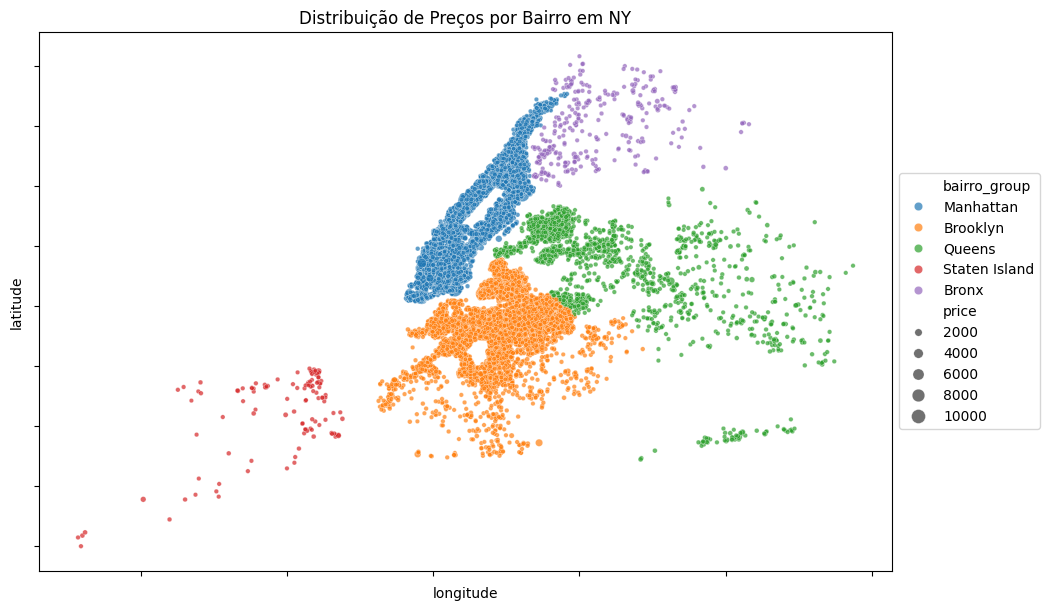

In [11]:
plt.figure(figsize=(11,7))
sns.scatterplot(
    x="longitude",
    y="latitude",
    hue="bairro_group",
    size="price",
    alpha=0.7,
    sizes=(10, 100),
    data=df
)
plt.title("Distribuição de Preços por Bairro em NY")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

Pegando pelo bairro e usando o price como o size nesse caso não vai deixar muito claro sobre a distribuição de valores pelo mapa. Nesse caso, com base nesse gráfico, podemos criar um novo com o valor de preço sendo o a referencia ao invés do bairro.

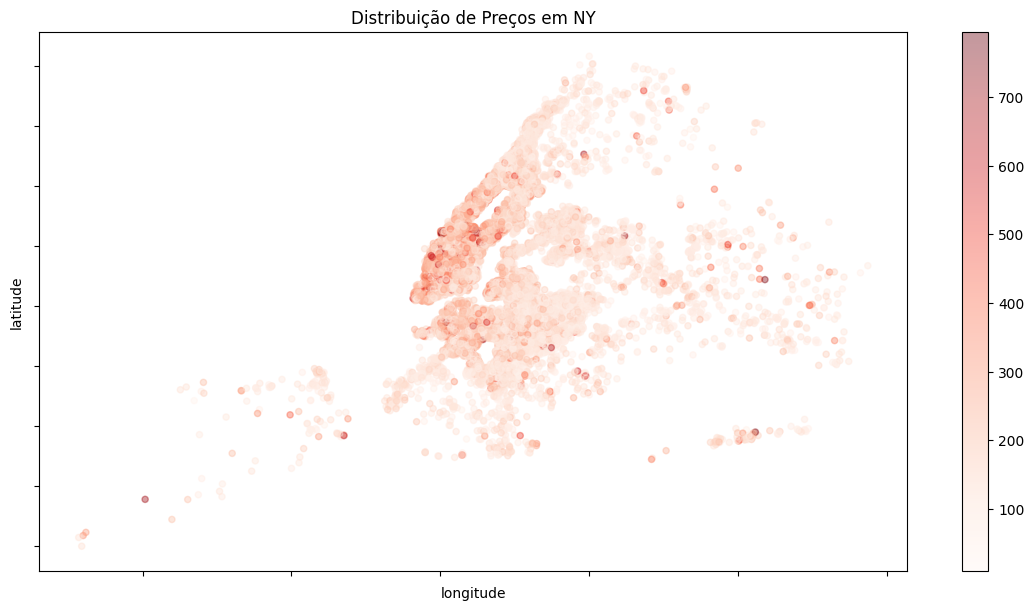

In [12]:
#Irei remover o primeiro percentil para não atrapalhar na escala do gráfico
df_sem_outliers = df[(df.price < df.price.quantile(0.99))]

#Para gráficos de scatterplots contínuos é bem melhor usar o matplotlib
df_sem_outliers.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    figsize=(14,7),
    c=df_sem_outliers.price,
    cmap=plt.get_cmap('Reds'),
    alpha=0.4,
)

plt.title("Distribuição de Preços em NY")
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

Como já foi mostrado anteriormente, em Manhattam há uma concentração bem alta de hoteis com preços elevados, especificamente na região de Downtown perto do Central Park (O pequeno retangulo que podemos ver em Manhattam). Já em lugares como no Queens e no Brooklyn, os valores mais altos tendem a se concentrar mais perto de Manhattam.

3. Há correlação entre o número de reviews e o preço final?

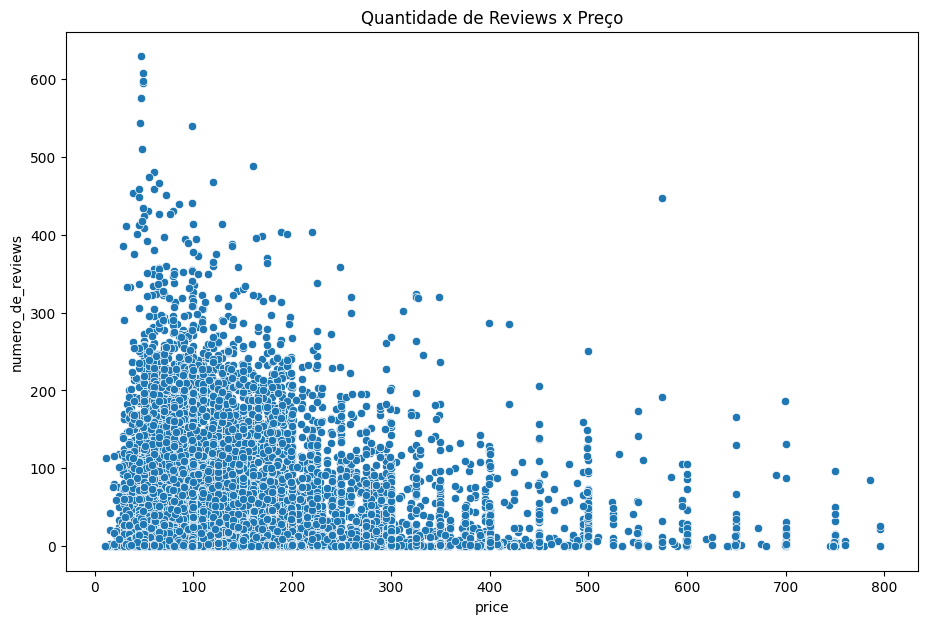

In [13]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=df_sem_outliers, x="price", y="numero_de_reviews")
plt.title("Quantidade de Reviews x Preço")
plt.show()

Podemos ver uma tendência interessante nesse gráfico. A medida que o preço fica mais caro o número de reviews cai. Há algumas hipóteses que podem explicar essa relação:
- Em hoteis mais baratos, pode haver a possibilidade do serviço não ser um dos melhores o que pode aumentar o numero de reviews naquele local.
- Em contra partida, para locais mais caros o serviço com certeza deve ser melhor e o cliente pode não sentir a necessidade de dar uma review, e caso dê, provavelmente vai ser um review positivo.
- Para hoteis mais baratos, com certeza haverá um volume maior de pessoas consumindo e consequentemente mais reviews
- Diferente de hoteis mais caros que provavelmente tem menor quantidade de pessoas alugando e consequentemente menos reviews

Seja qual for a verdade, seria preciso outros dados para complementar esta resposta como a nota média do local ou a quantidade de pessoas que consumiram no mês ou no ano.

4. Há algum tipo de relação do tipo de quarto com o preço? Há um padrão de tipo de quarto disponibilizado em cada bairro?

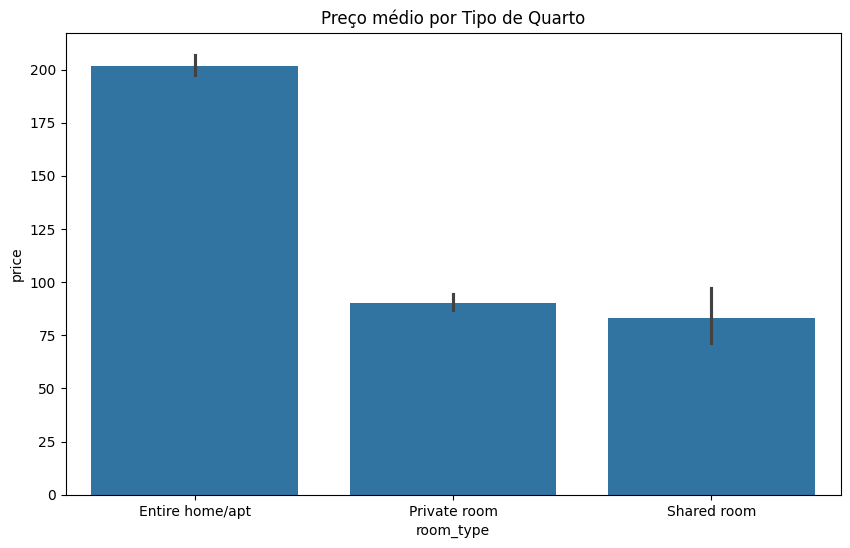

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x="room_type", y="price", data=df)
plt.title("Preço médio por Tipo de Quarto")
plt.show()

Faz sentido casas e apartamentos inteiros terem valores maiores de alugueis de que salas privadas e compartilhadas. Resta saber se há algum padrão dentre os bairros, se há preferências por algum tipo de quarto.

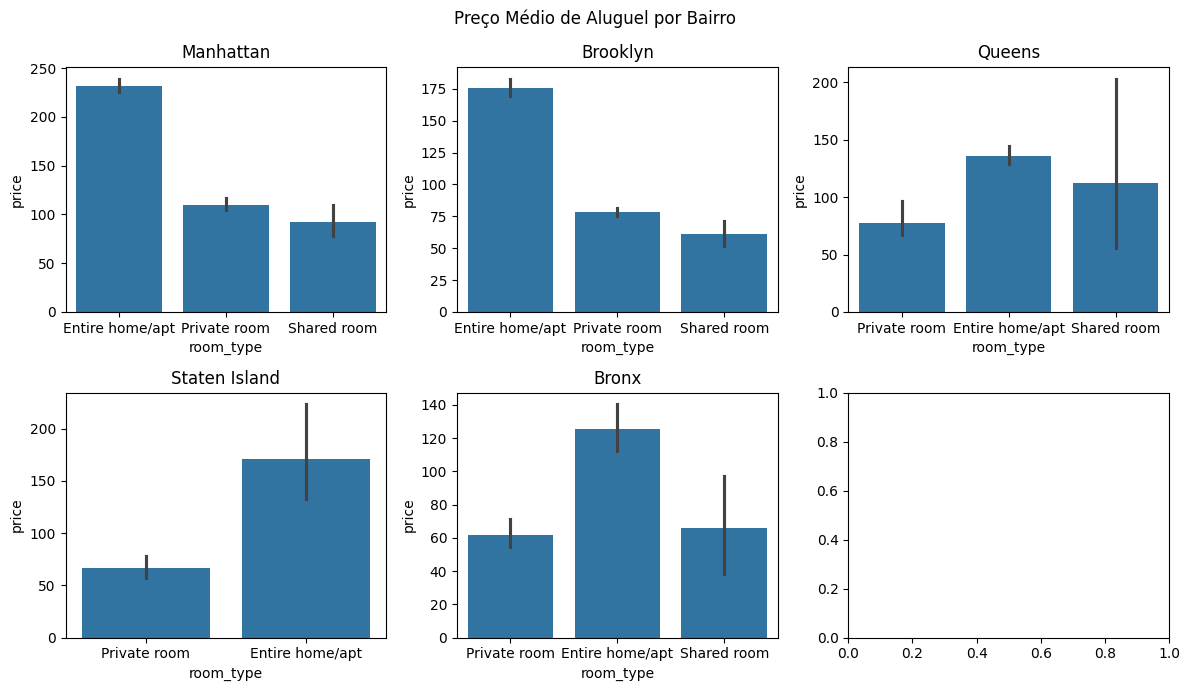

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

for i, bairro_group in enumerate(df.bairro_group.unique()):
    df_bairro = df[df.bairro_group == bairro_group]
    sns.barplot(x="room_type", y="price", data=df_bairro, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(bairro_group)

fig.suptitle('Preço Médio de Aluguel por Bairro')
plt.tight_layout()
plt.show()

Nos gráficos é visto que a quantidade de demanda segue o mesmo padrão de preços, com apartamento/casa sendo bem mais caro e salas privadas e compartilhadas quase ali com o mesmo preço. Levando em conta os preços, me chama atenção que hoteis no Brooklyn, apesar de tão numerosos quanto os de Manhattam tem um preço bem mais acessível o que pode tornar bem atrativo dependendo da finalidade do aluguel (Férias, Visita, Trabalho).

Em seguida vamos ver a demanda dos tipos de quartos, se há algum padrão para diferentes bairros

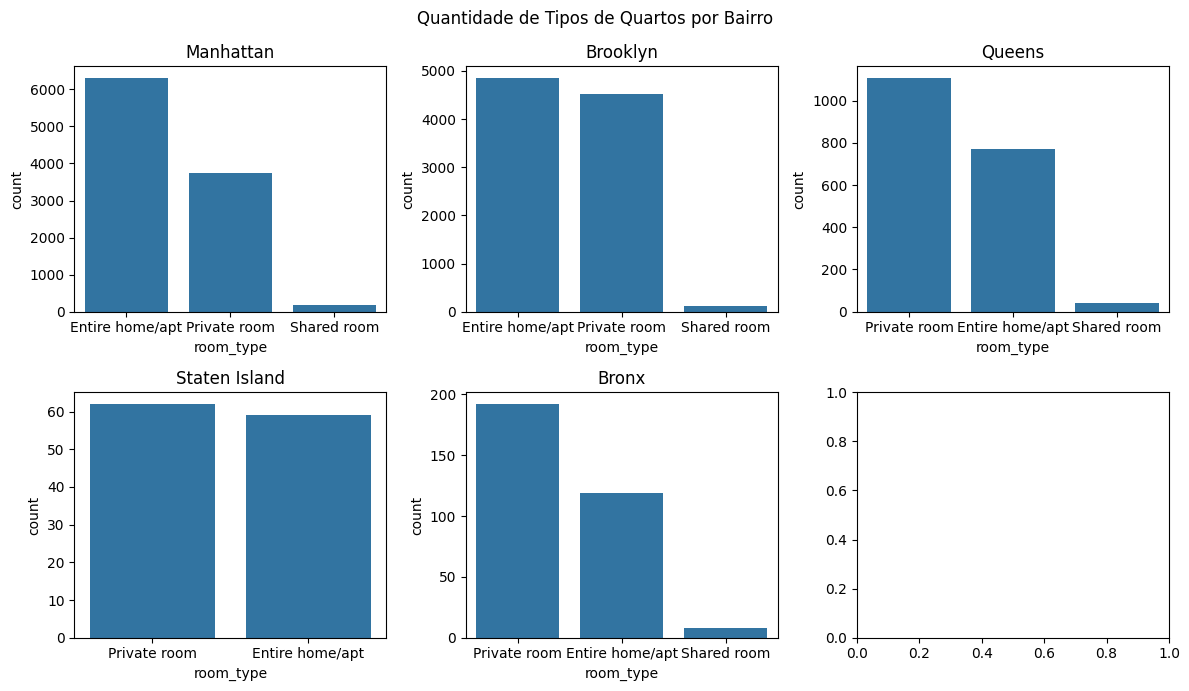

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

for i, bairro_group in enumerate(df.bairro_group.unique()):
    df_bairro = df[df.bairro_group == bairro_group]
    sns.countplot(x="room_type", data=df_bairro, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(bairro_group)

fig.suptitle('Quantidade de Tipos de Quartos por Bairro')
plt.tight_layout()
plt.show()

Outra coisa interessante, a gente pode ver que apenas em Manhattam a quantidade de alugueis em apartamentos/casas superam salas privadas. Isso se deve provavelmente a alta urbanização do local.


---
Considerando uma viagem rápida, um aluguel no **Brooklyn** valeria muito a pena.
- Bem localizado: Perto de pontos turísticos e de lazer, é facil fazer um deslocamento para Manhattam caso queira.
- Alta demanda: 41% do total de locais para alugar são de lá
- Preço médio: Caso você queira gastar pouco, o preço médio de uma sala privada por lá por noite é de $75. E caso você queira mais comodidade em um apartamento ou casa o aluguel lá é 30% menor que o de Manhattam.
---


### **O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?**

1. Há alguma relação do preço médio com a quantidade de noites minimas a serem alugadas ou com a quantidade de locais que o anfitrião disponibiliza? (Serão essas pessoas mais experientes e conseguem disponibilizar preços mais acessíveis?)

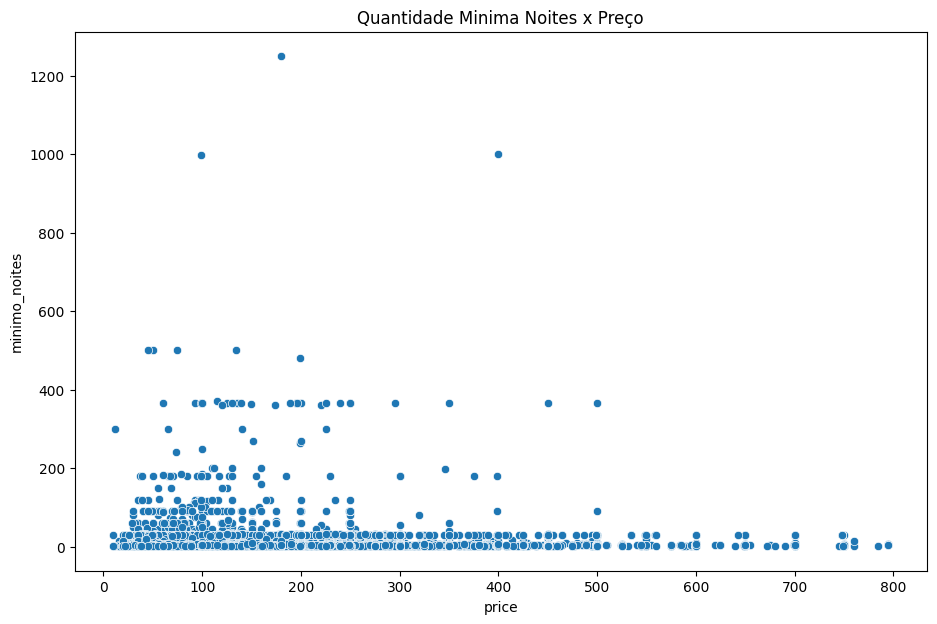

In [18]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=df_sem_outliers, x="price", y="minimo_noites")
plt.title("Quantidade Minima Noites x Preço")
plt.show()

Apesar de mínima, a gente pode ver uma concentração de locais com o minimo de noites um pouco elevado para hoteis com o preço de 0 a 175~200. Dessa forma, acredito que seja melhor fazer uma categorização dos preços e verificar a média de minima de noites para ver se de fato há uma concentração maior nesses casos.

Pegando essa info como base, decidi criar essas 4 categorias:
- Baixo: (0 - 75]
- Medio: (75 - 175]
- Alto: (175 - 500]
- Muito Alto: (500 - inf]

In [29]:
def categorical_price(price):
  if price <= 75:
    return 'BAIXO'
  elif price > 75 and price <= 175:
    return 'MEDIO'
  elif price > 175 and price <= 500:
    return 'ALTO'
  else:
    return 'MUITO ALTO'

df["categorical_price"] = df.price.apply(categorical_price)

<Axes: xlabel='categorical_price', ylabel='minimo_noites'>

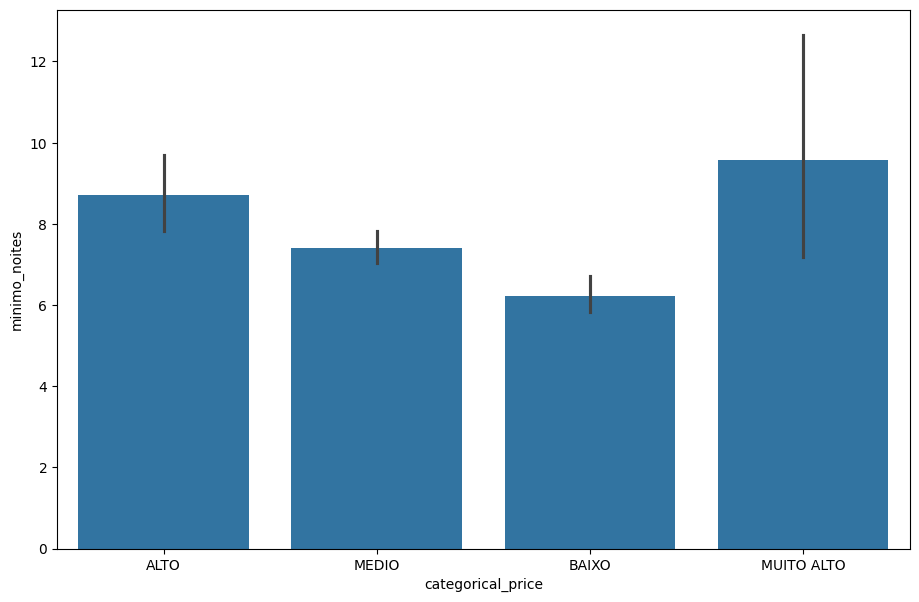

In [30]:
plt.figure(figsize=(11,7))
sns.barplot(x="categorical_price", y="minimo_noites", data=df)

Pelo gráfico talvez alguns valores podem estar trazendo ruído as categorias, principalmente para categoria muito alta. Removendo outliers, temos:

<Axes: xlabel='categorical_price', ylabel='minimo_noites'>

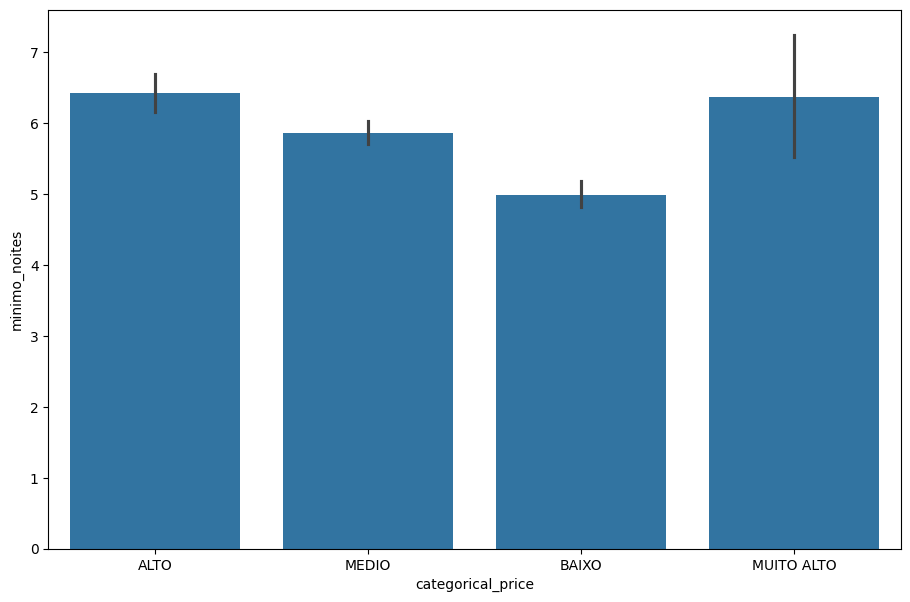

In [34]:
df_sem_outliers_min_noites = df[df.minimo_noites < df.minimo_noites.quantile(0.99)]
plt.figure(figsize=(11,7))
sns.barplot(x="categorical_price", y="minimo_noites", data=df_sem_outliers_min_noites)

Pelo o que apareceu usando categorização das variáveis não me pareceu haver uma relação direta entre preço e o minimo de noites ofertadas, no entanto é importante pelo menos realizar um calculo de correlação e um teste estatístico antes de afirmar alguma coisa.

In [38]:
import scipy.stats as stats

dados_limpos = df.dropna(subset=['minimo_noites', 'price'])

correlacao, p_valor = stats.pearsonr(dados_limpos['minimo_noites'], dados_limpos['price'])

print("Correlação de Pearson:", correlacao)
print("P-valor:", p_valor)

# Interpretação do p-valor
if p_valor < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")

Correlação de Pearson: 0.036497338053368675
P-valor: 5.8431695235440857e-08
A correlação é estatisticamente significativa.


Apesar de haver uma correlação estatisticamente significativa, ela tem um valor bem baixo de correlação. Existem algumas hipóteses para isso:
1. Apesar das variáveis estarem estatisticamente significativas, por causa ao grande tamanho da amostra, correlação é tão baixa que pode não ter impacto significativo na relação entre as variáveis.
2. Outliers, variação dos dados ou o método de análise podem estar afetando diretamente o resultado

---
Fazendo essa mesma análise para disponibilidade no ano temos:

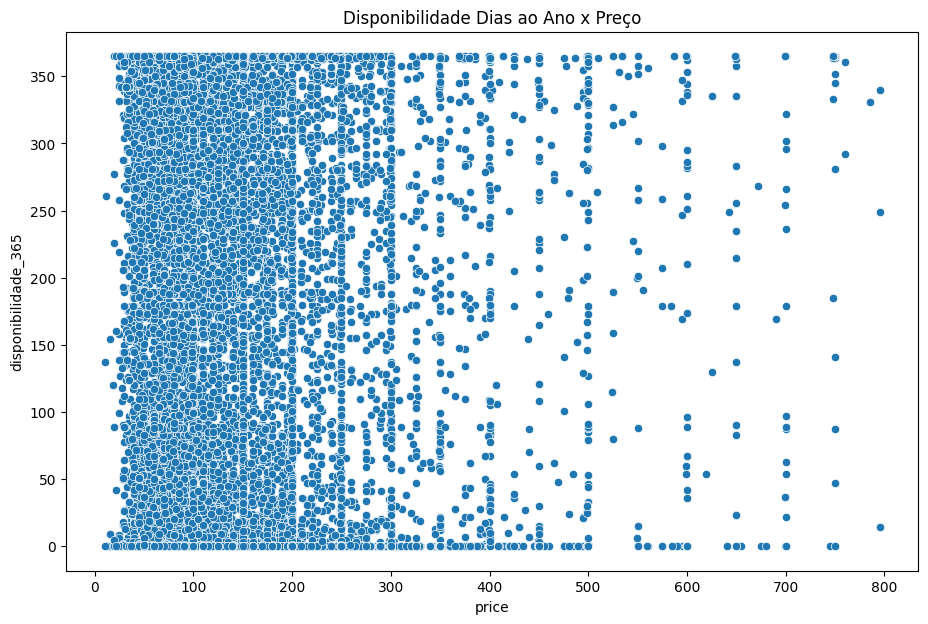

In [43]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=df_sem_outliers, x="price", y="disponibilidade_365")
plt.title("Disponibilidade Dias ao Ano x Preço")
plt.show()

Fica bem difícil concluir alguma coisa com o gráfico, mas me parece que há uma concentração até que relativamente igual entre a quantidade de hoteis ofertados e a disponibilidade no ano. Melhor ver como se comporta usando a vaeriável categorica de preço.

<Axes: xlabel='categorical_price', ylabel='disponibilidade_365'>

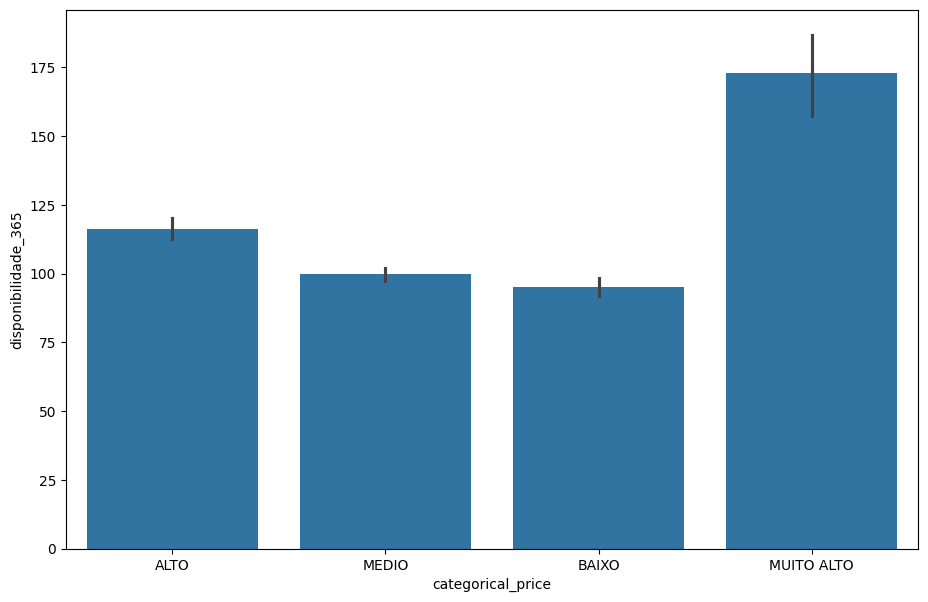

In [42]:
plt.figure(figsize=(11,7))
sns.barplot(x="categorical_price", y="disponibilidade_365", data=df)

Nesse gráfico já traz algo mais interessante com a média de disponibilidade ao ano sendo um pouco mais alta para valores com preços mais altos, mas devido a baixa quantidade de valores e o desvio padrão alto fica difícil concluir algo com isso.

In [41]:
dados_limpos = df.dropna(subset=['disponibilidade_365', 'price'])

correlacao, p_valor = stats.pearsonr(dados_limpos['disponibilidade_365'], dados_limpos['price'])

print("Correlação de Pearson:", correlacao)
print("P-valor:", p_valor)

# Interpretação do p-valor
if p_valor < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")

Correlação de Pearson: 0.059293832825713516
P-valor: 1.1890230150041617e-18
A correlação é estatisticamente significativa.


O problema cai para o mesmo que foi com a variável minimo_noites. Mas nesse caso pelo menos a gente pode observar um aumento na média de dias disponíveis com o preço ofertado.

### **Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

Para esta análise irei usar algumas bibliotecas de visualização de palavras como wordcloud junto com biblioteca de NLP como nltk afim de visualizar e calcular ocorrência de certas palavras em anúncios. Para isso irei considerar valores acima de 500 como hoteis de grandes valores.

1. Colocar todas as palavras em uma lista.
Primeiramente iremos ver uma visão geral das palavras mais comuns e logo em seguida realizar uma análise apenas de palavras com alugueis altos.

In [61]:
import nltk
import re

In [73]:
def remover_caracter_especial(palavra):
  regex = r'[^a-zA-Z\s]'
  return re.sub(regex, '', palavra)

In [74]:
lista_palavras = []
titulos = df.nome.to_list()

for titulo in titulos:
  #Separar as palavras do titulo em uma lista
  palavras = str(titulo).split()
  #Adicionar todas as palavras em minusculo
  palavras = [remover_caracter_especial(palavra.lower()) for palavra in palavras]
  #Adicionar as palavras tratadas na lista e remover espaços em brancos
  for palavra in palavras:
    if palavra != '':
      lista_palavras.append(palavra)

In [75]:
lista_palavras[:10]

['skylit',
 'midtown',
 'castle',
 'the',
 'village',
 'of',
 'harlemnew',
 'york',
 'cozy',
 'entire']

No entanto é importante remover palavras/pontuações que não fazem sentido para a análise. Para isso iremos remover o que chamamos de "stopwords"

In [76]:
from nltk.corpus import stopwords
nltk.download('stopwords') # Habilitar para download

lista_palavras_sem_stopwords = [palavra for palavra in lista_palavras if palavra not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
lista_palavras_sem_stopwords[:10]

['skylit',
 'midtown',
 'castle',
 'village',
 'harlemnew',
 'york',
 'cozy',
 'entire',
 'floor',
 'brownstone']

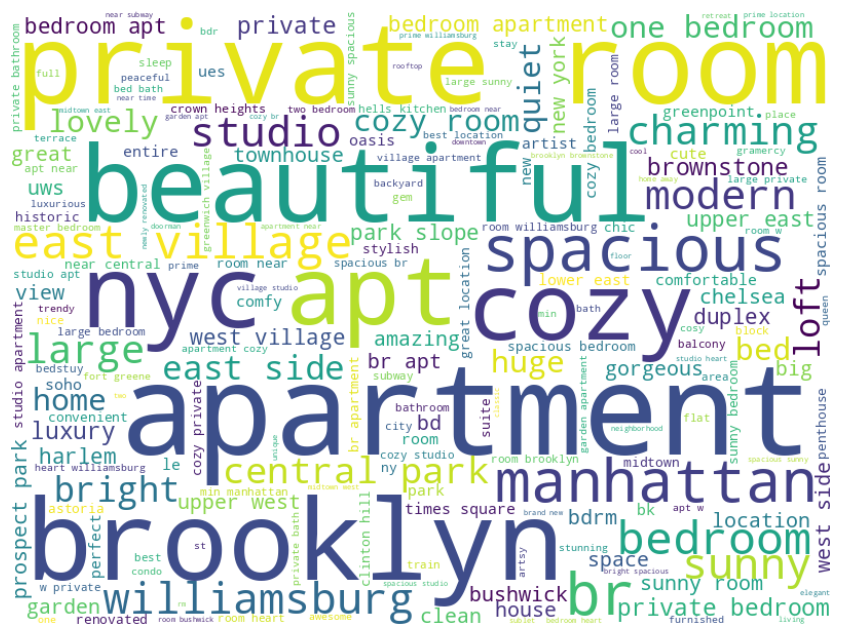

In [80]:
from wordcloud import WordCloud

# Criar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(" ".join(lista_palavras_sem_stopwords))

# Plotar a nuvem de palavras
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

A gente pode ver uma frequencia de palavras bem interessantes, principalmente em adjetivos (cozy, beautiful, spacious, private) e também a localidade (brooklyn, manhattam, nyc). Vendo esse padrão, agora é interessante fazer uma comparação apenas com os valores mais altos.

In [81]:
lista_palavras = []
df_alto = df[df.categorical_price.isin(["ALTO", "MUITO ALTO"])]
titulos = df_alto.nome.to_list()

for titulo in titulos:
  #Separar as palavras do titulo em uma lista
  palavras = str(titulo).split()
  #Adicionar todas as palavras em minusculo
  palavras = [remover_caracter_especial(palavra.lower()) for palavra in palavras]
  #Adicionar as palavras tratadas na lista e remover espaços em brancos
  for palavra in palavras:
    if palavra != '':
      lista_palavras.append(palavra)

In [82]:
lista_palavras[:10]

['skylit',
 'midtown',
 'castle',
 'large',
 'cozy',
 'br',
 'apartment',
 'in',
 'midtown',
 'east']

In [83]:
from nltk.corpus import stopwords
nltk.download('stopwords') # Habilitar para download

lista_palavras_sem_stopwords = [palavra for palavra in lista_palavras if palavra not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


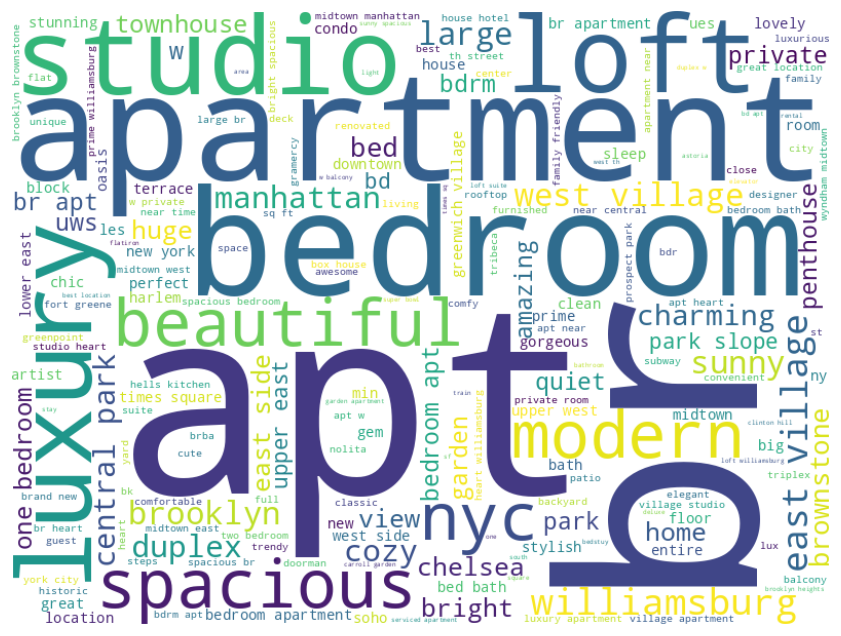

In [84]:
from wordcloud import WordCloud

# Criar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(" ".join(lista_palavras_sem_stopwords))

# Plotar a nuvem de palavras
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Muito interessante que além das palavras anteriores, vieram novas palavras em destaque que caracterizam bem apartamentos de altos valores, como luxury, spacious mas outras coisas chamam bem atenção como loft e studio aparecendo bastante também, que na teoria deveriam ser moradias mais baratas, mas provavelmente pela localidade ficam bastante caras.

### Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

1. Qual o tipo de problema que iremos resolver?

Por se tratar de um problema onde a variável que a gente deseja prever é uma variável contínua com certeza este é um problema de **regressão**.

Começando a transformações, primeiro será utilizado o LabelEncoder em 3 colunas categoricas no dataset: room_type, bairro e bairro_group. Isso nos permite uma melhor performance e é mais amigável esse tipo de entrada para o modelo posterior.

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["room_type_encoded"] = le.fit_transform(df["room_type"])
df["bairro_encoded"] = le.fit_transform(df["bairro"])
df["bairro_group_encoded"] = le.fit_transform(df["bairro_group"])

Iremos preencher valores nulos de algumas colunas pois alguns modelos não aceitam valores nan nas colunas

In [102]:
df.loc[df.reviews_por_mes.isna(), "reviews_por_mes"] = 0
df.loc[df.calculado_host_listings_count.isna(), "calculado_host_listings_count"] = df.calculado_host_listings_count.mean()
df.loc[df.disponibilidade_365.isna(), "disponibilidade_365"] = df.disponibilidade_365.mean()

Para início dos testes resolvi primeiro utilizar a Regressão Linear por se tratar de um modelo até bem simples para regressão e ver como ele performaria. Eu irei utitlizar três métricas de avaliação: r2_score (O quão próximos os dados estão da linha de regressão ajustada), mean_absolute_error (medida do erro médio absoluto entre as previsões do modelo e os valores reais da variável dependente nos dados de teste) e mean_squared_error (medida do erro médio quadrático entre as previsões do modelo e os valores reais da variável dependente nos dados de teste).

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split


X = df[
    ['bairro_group_encoded','bairro_encoded','room_type_encoded',
     'minimo_noites','numero_de_reviews','reviews_por_mes',
     'calculado_host_listings_count','disponibilidade_365']
  ]

y = df["price_log"]
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [109]:
print(r2_score(y_test,y_pred) * 100)
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

39.43698019073231
0.1640357327522336
0.22683020423327768


Agora irei usar alguns algoritmos um pouco mais sofisticados como o de árvore de decisão e Gradient Boosting e ver como eles se saem no resultado comparado a regressão linear

In [111]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=1)
decision_tree = dt.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [112]:
print(r2_score(y_test,y_pred) * 100)
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

47.57606998956815
0.15110703359605204
0.21103860643692743


In [113]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=1)
gradient_boosting = gb.fit(X_train, y_train)

y_pred = gradient_boosting.predict(X_test)

In [114]:
print(r2_score(y_test,y_pred) * 100)
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

55.198168718630505
0.1381896849275806
0.19509449091656256


Pegando os 3 modelos testados, com certeza o melhor que saiu foi o Gradient Boosting com um r2 maior e um MSE e MAE menores que os outros dois modelos.

Supondo um apartamento com as seguintes características:

In [118]:
apartamento = [{
  'id': 2595,
  'nome': 'Skylit Midtown Castle',
  'host_id': 2845,
  'host_name': 'Jennifer',
  'bairro_group': 'Manhattan',
  'bairro': 'Midtown',
  'latitude': 40.75362,
  'longitude': -73.98377,
  'room_type': 'Entire home/apt',
  'price': 225,
  'minimo_noites': 1,
  'numero_de_reviews': 45,
  'ultima_review': '2019-05-21',
  'reviews_por_mes': 0.38,
  'calculado_host_listings_count': 2,
  'disponibilidade_365': 355
}]


Qual seria o preço?

In [119]:
df_teste = pd.DataFrame(apartamento)

In [122]:
df_teste["room_type_encoded"] = le.fit_transform(df_teste["room_type"])
df_teste["bairro_encoded"] = le.fit_transform(df_teste["bairro"])
df_teste["bairro_group_encoded"] = le.fit_transform(df_teste["bairro_group"])

In [125]:
X = df_teste[
    ['bairro_group_encoded','bairro_encoded','room_type_encoded',
     'minimo_noites','numero_de_reviews','reviews_por_mes',
     'calculado_host_listings_count','disponibilidade_365']
  ]

y_pred = gradient_boosting.predict(X)
print(10 ** y_pred) #Retornar a base normal

[153.44545288]


O preço previsto usando Gradient Boosting seria de $ 153.44

In [126]:
import pickle

with open('modelo_gradient_boosting.pkl', 'wb') as f:
  pickle.dump(gradient_boosting, f)

Chegando ao final, ficam algumas ideias de melhorias para a criação do modelo final para melhorar os atributos:
- Pode ser criado colunas dummys para os dados categoricos, assim poderiam ter mais variaveis que poderiam refletir no resultado.
- Poderia ser feito outros tipos de validação como a validação cruzado e busca pelos melhores parâmetros utilizando KFold.